In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

import random
import numpy as np
import matplotlib.pyplot as plt

In [21]:
x_values = np.linspace(-1, 1, 100)
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_train = x_train**2 + random.uniform(-20, 20)

In [22]:
class LR(nn.Module):
    def __init__(self):
        super(LR, self).__init__()
        self.hidden1 = nn.Linear(1, 10)
        self.hidden2 = nn.Linear(10, 1)
        
    def forward(self, x):
        x = F.relu(self.hidden1(x))
        out = self.hidden2(x)
        return out

In [23]:
print(len(x_train))
x_train[:10]

100


array([[-1.        ],
       [-0.97979796],
       [-0.959596  ],
       [-0.93939394],
       [-0.9191919 ],
       [-0.8989899 ],
       [-0.8787879 ],
       [-0.85858583],
       [-0.83838385],
       [-0.8181818 ]], dtype=float32)

In [24]:
print(len(y_train))
y_train[:10]

100


array([[15.537694 ],
       [15.497698 ],
       [15.458518 ],
       [15.420155 ],
       [15.382607 ],
       [15.345877 ],
       [15.309962 ],
       [15.274863 ],
       [15.2405815],
       [15.207115 ]], dtype=float32)

In [25]:
model = LR()
loss_func = nn.MSELoss()
lr = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr = lr)

plt.ion()

epoch 50, loss 0.05865535


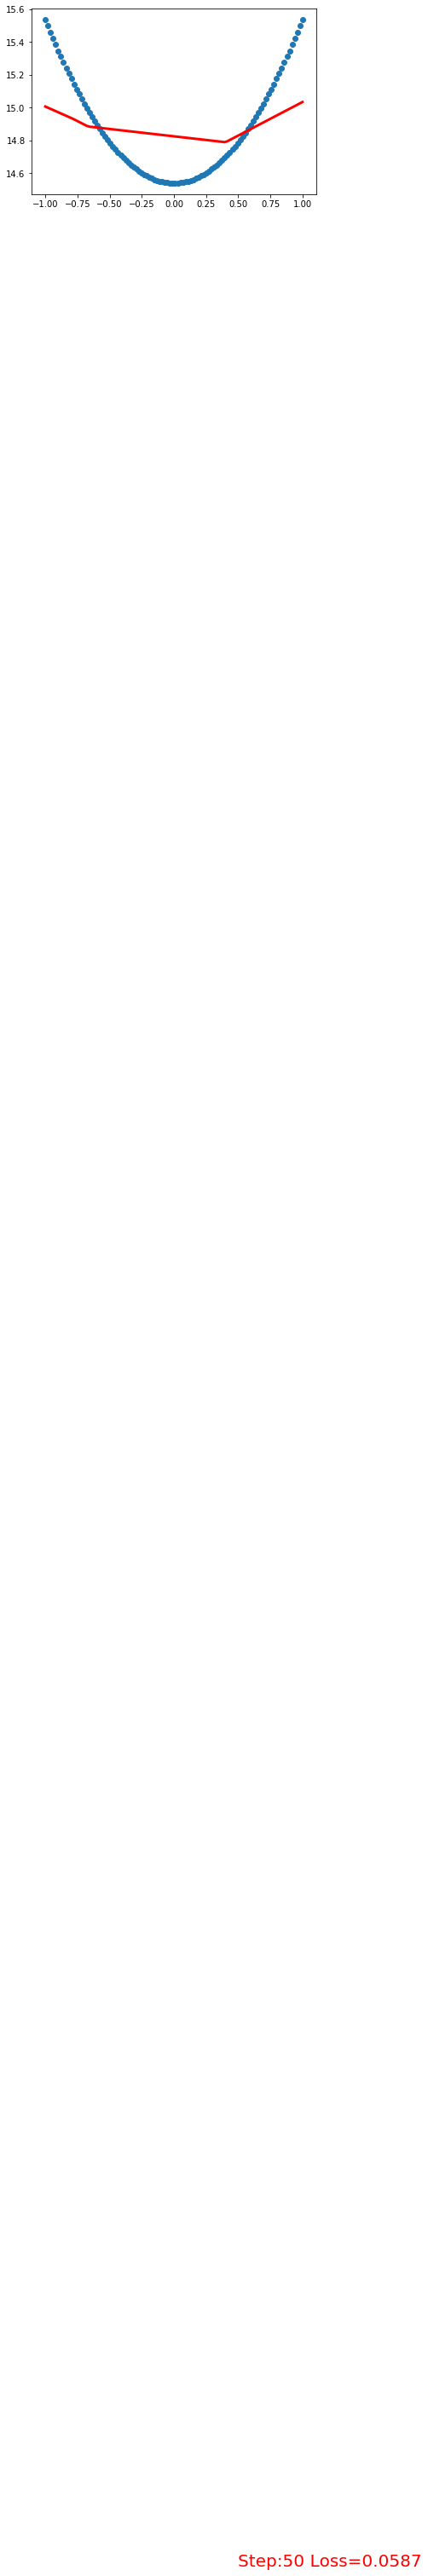

epoch 100, loss 0.04916262


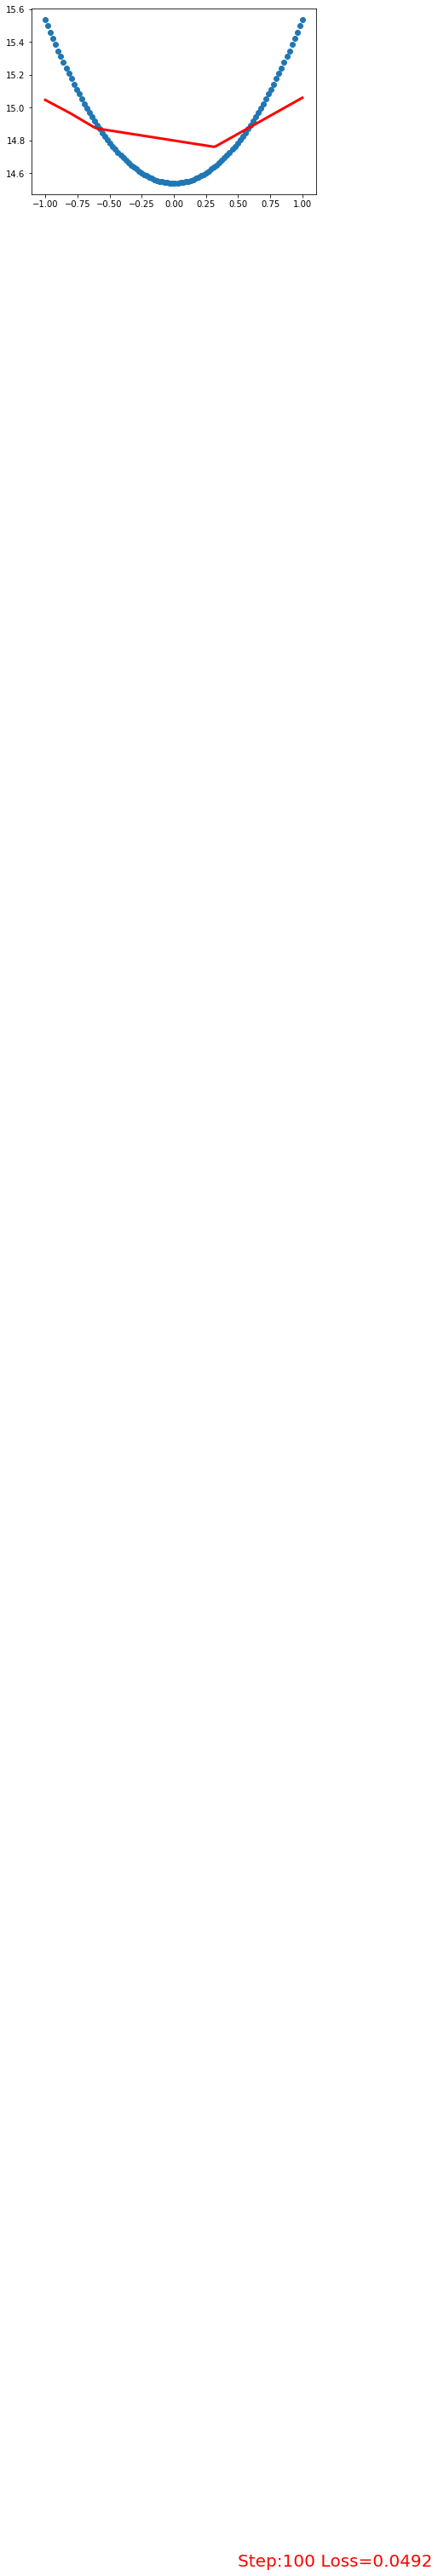

epoch 150, loss 0.04065227


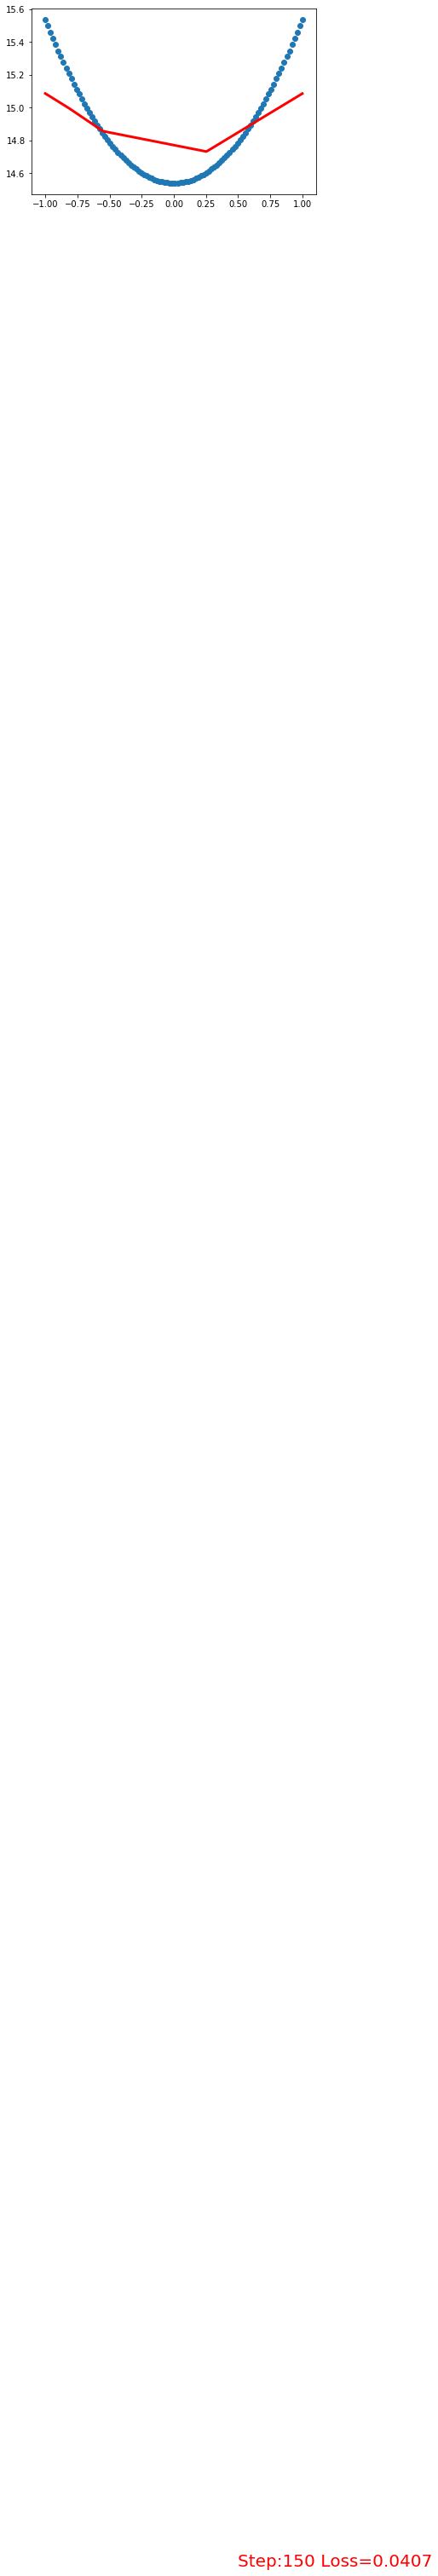

epoch 200, loss 0.03322814


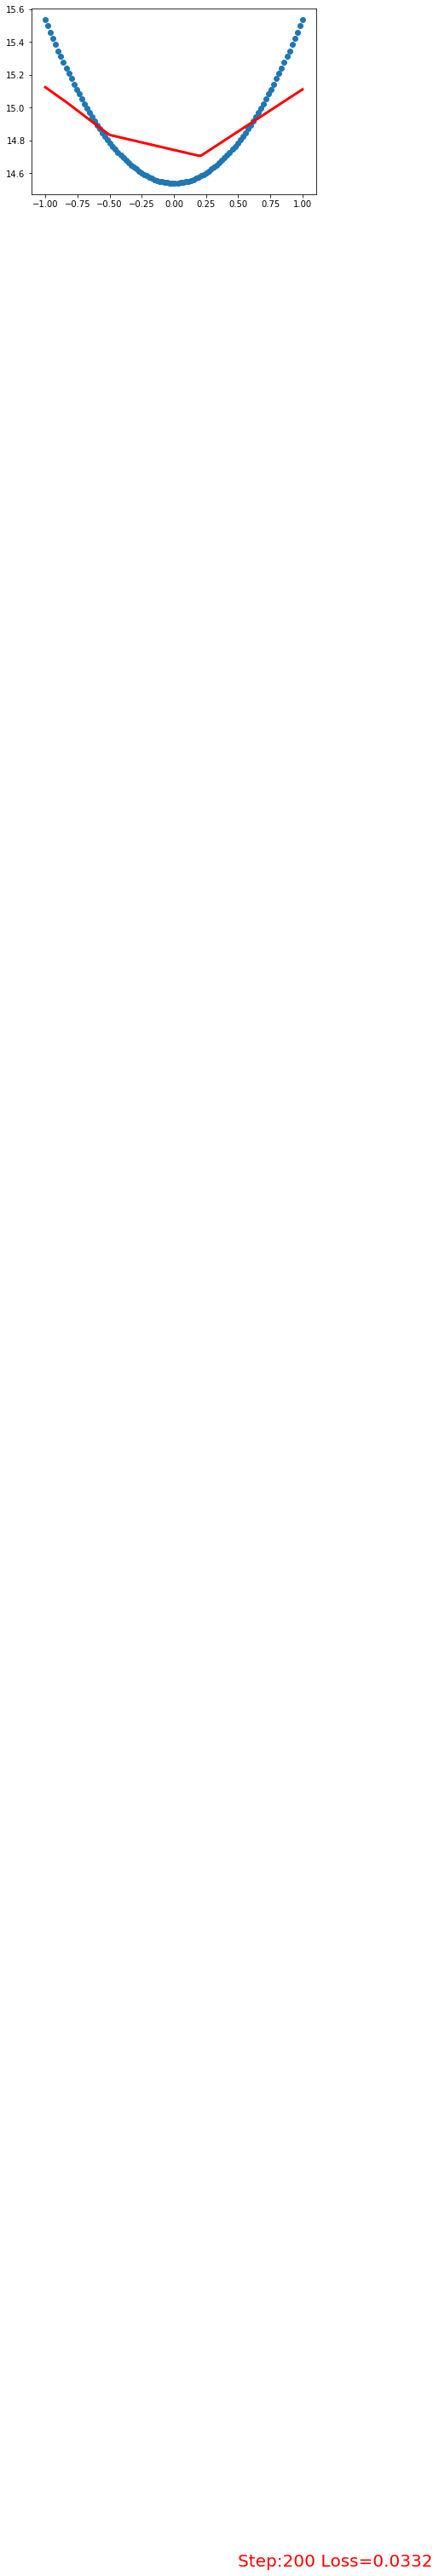

epoch 250, loss 0.02689388


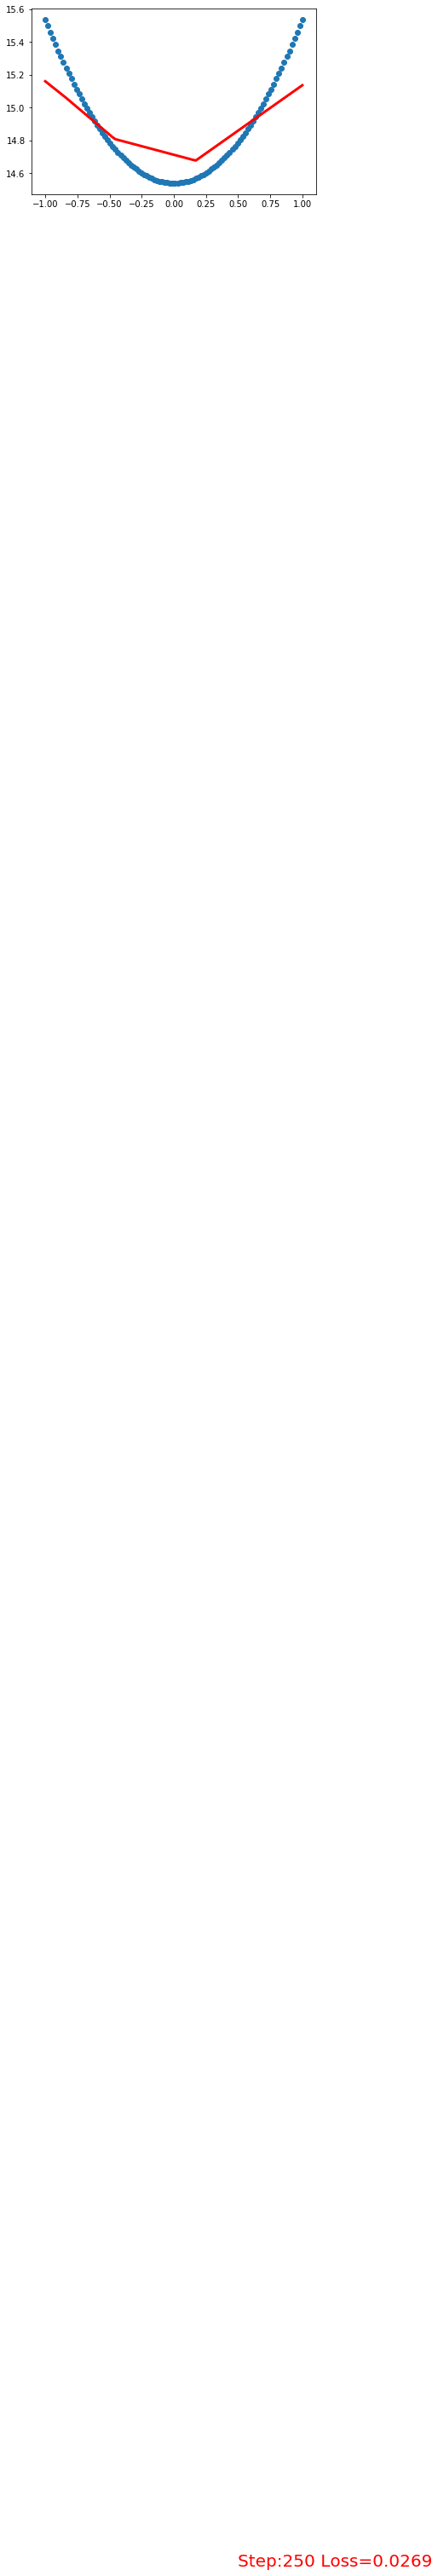

epoch 300, loss 0.02164474


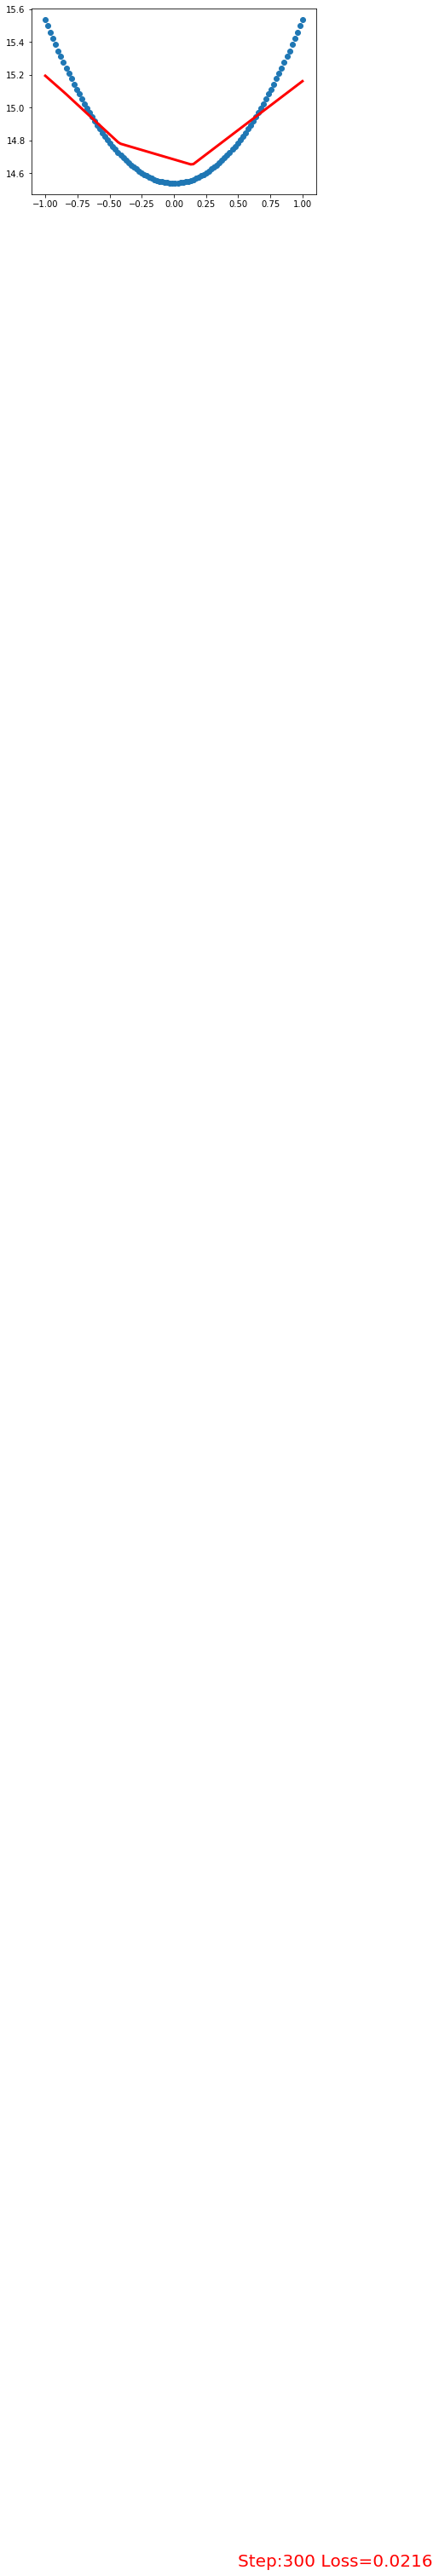

epoch 350, loss 0.01737761


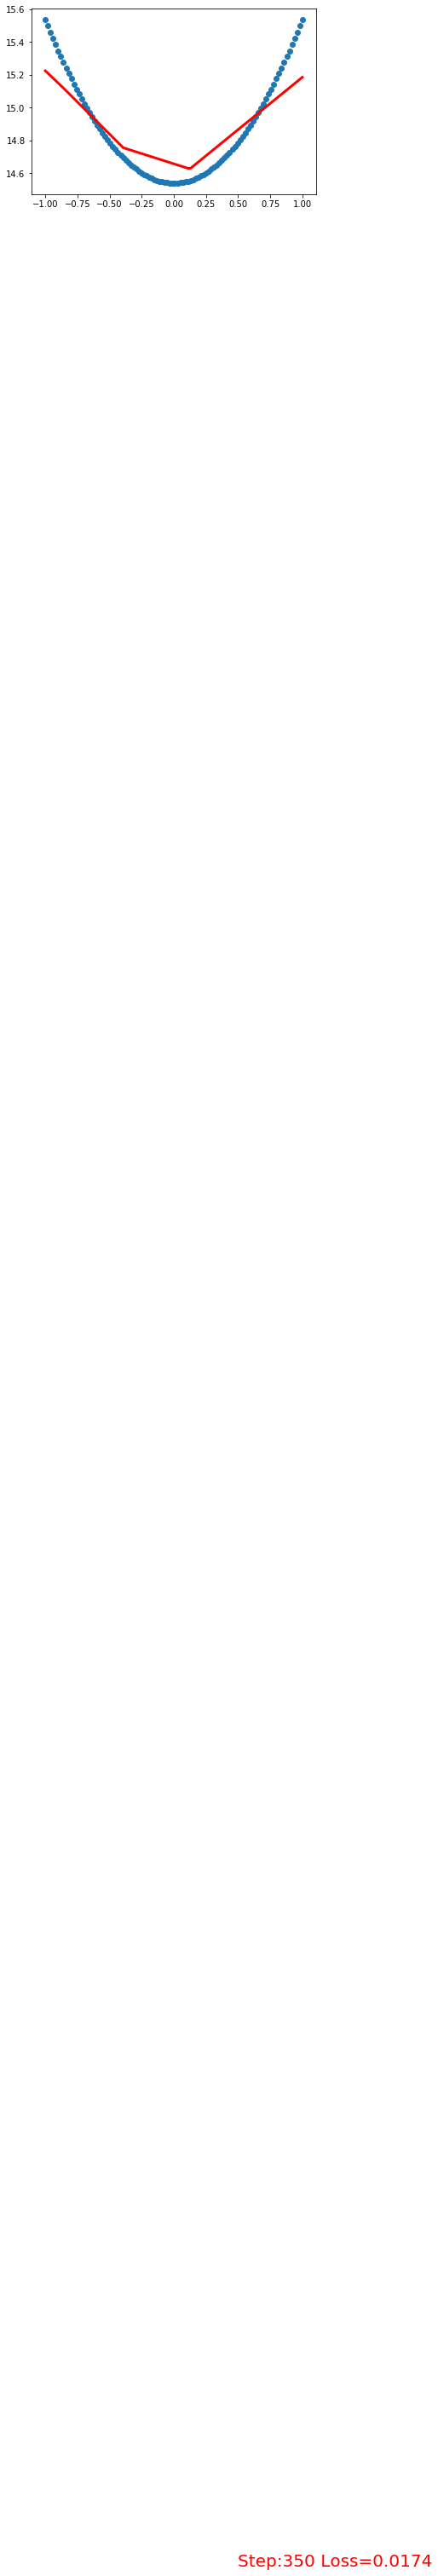

epoch 400, loss 0.01399141


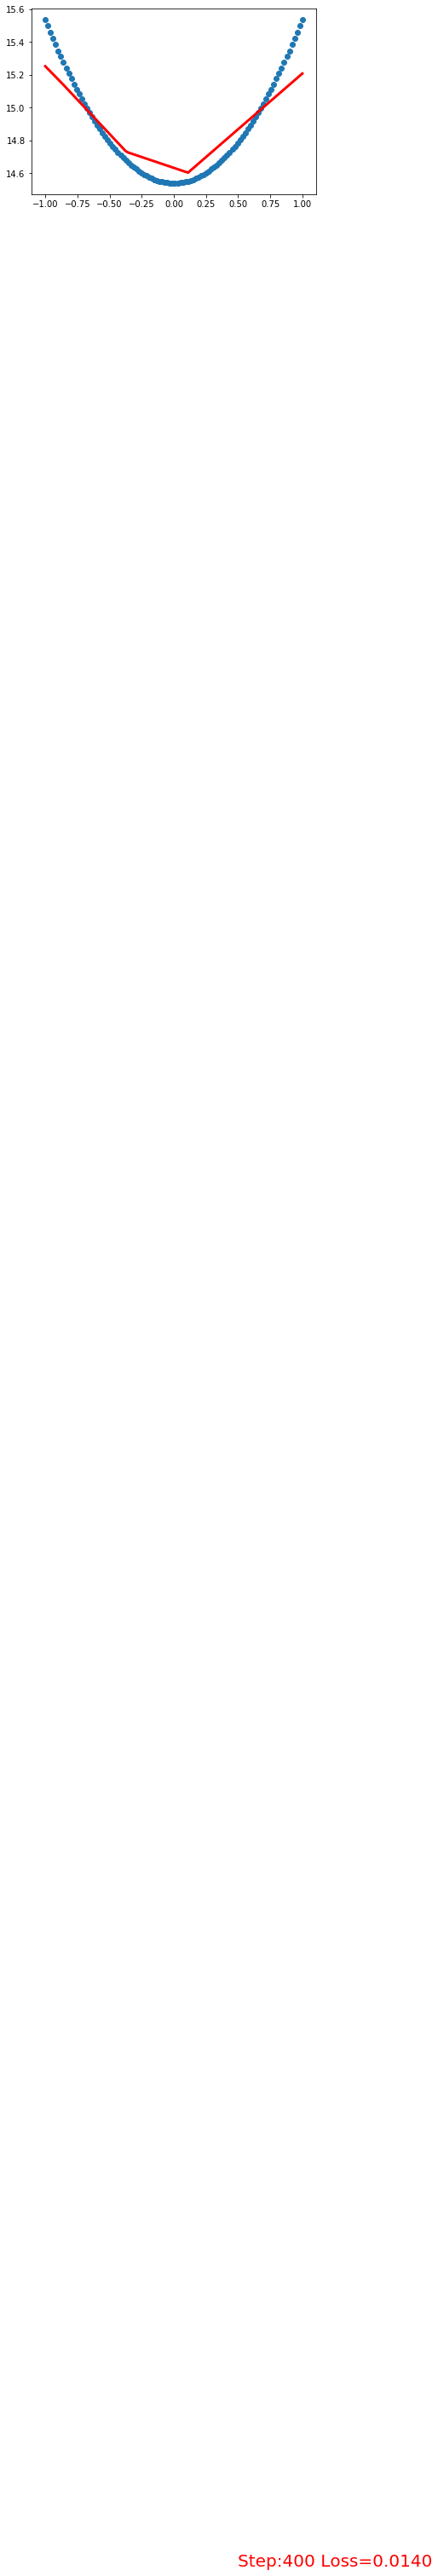

epoch 450, loss 0.01136040


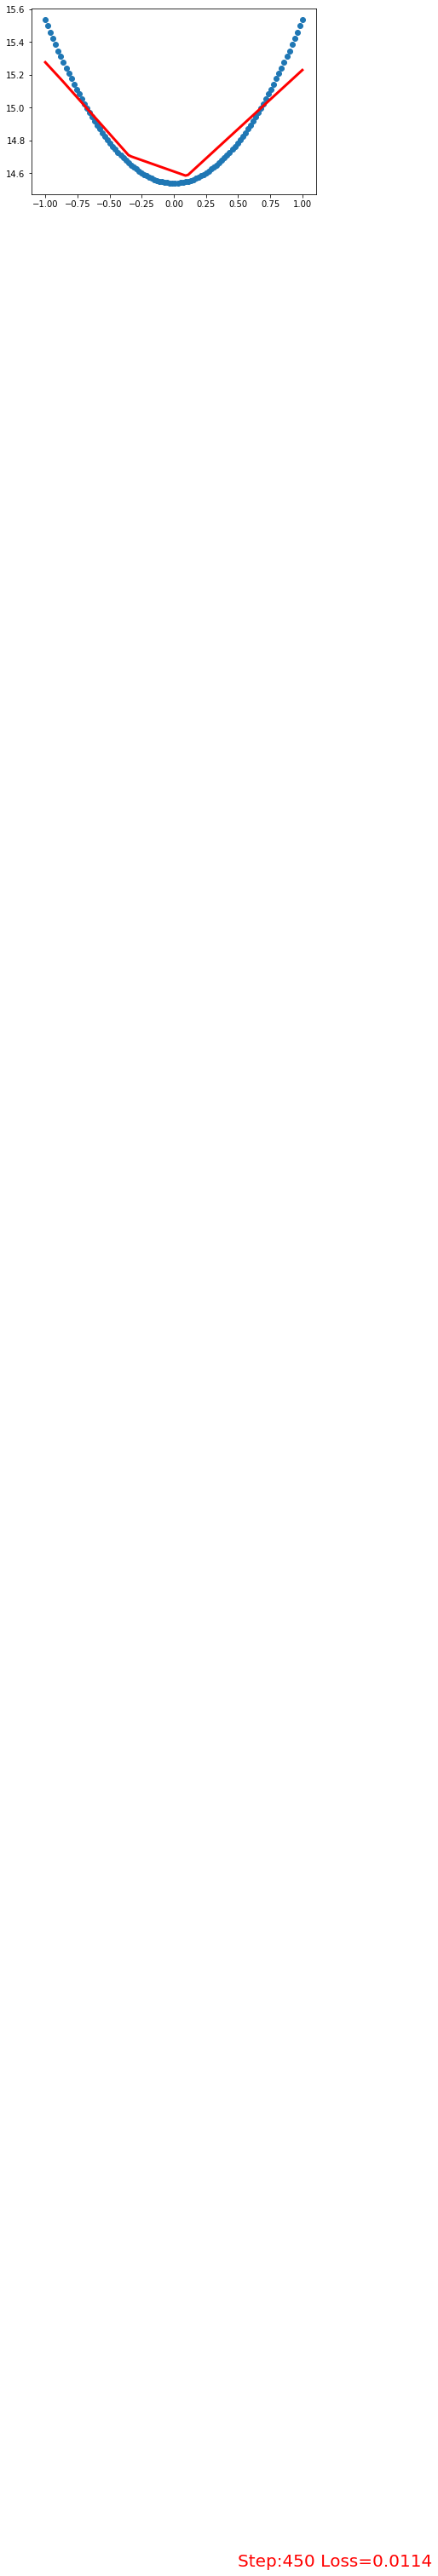

epoch 500, loss 0.00933702


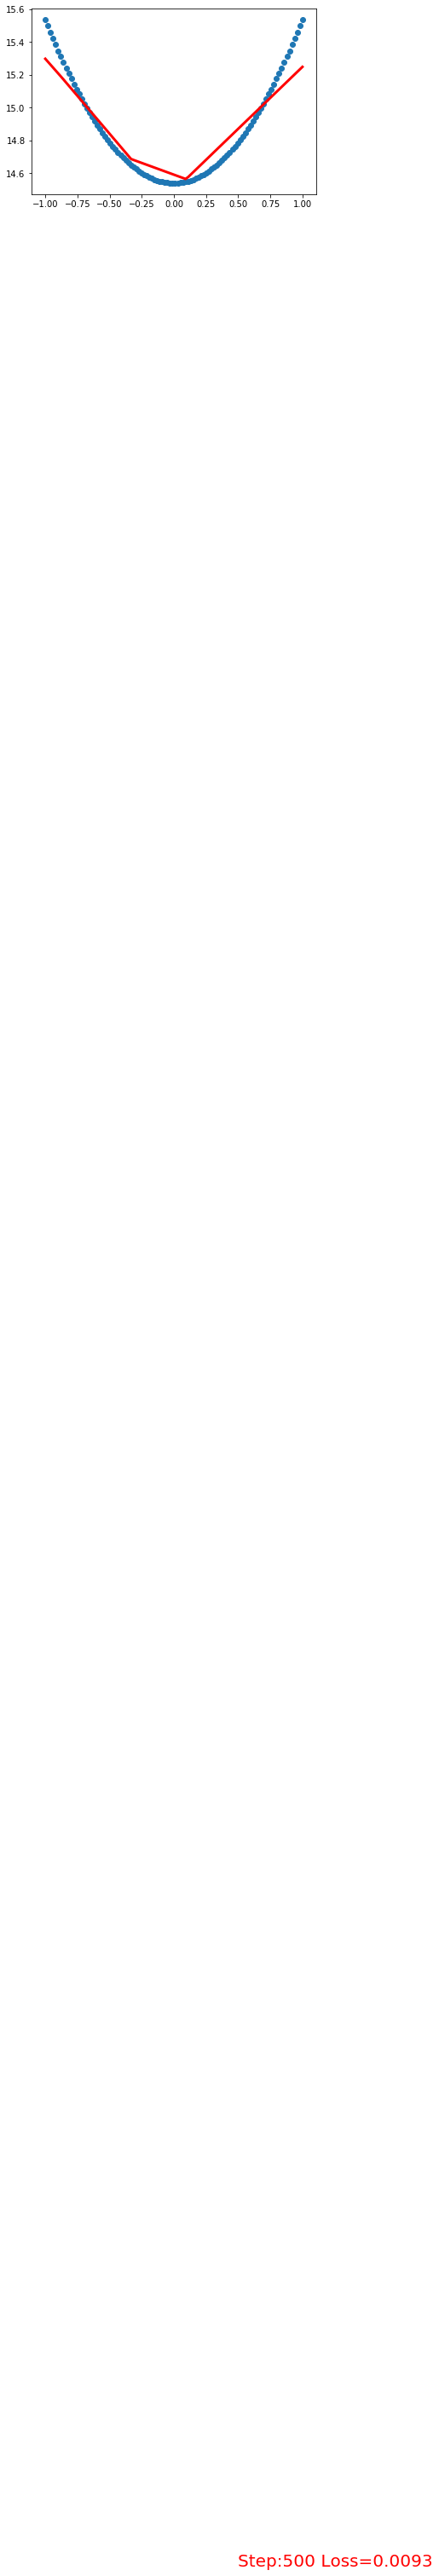

epoch 550, loss 0.00780807


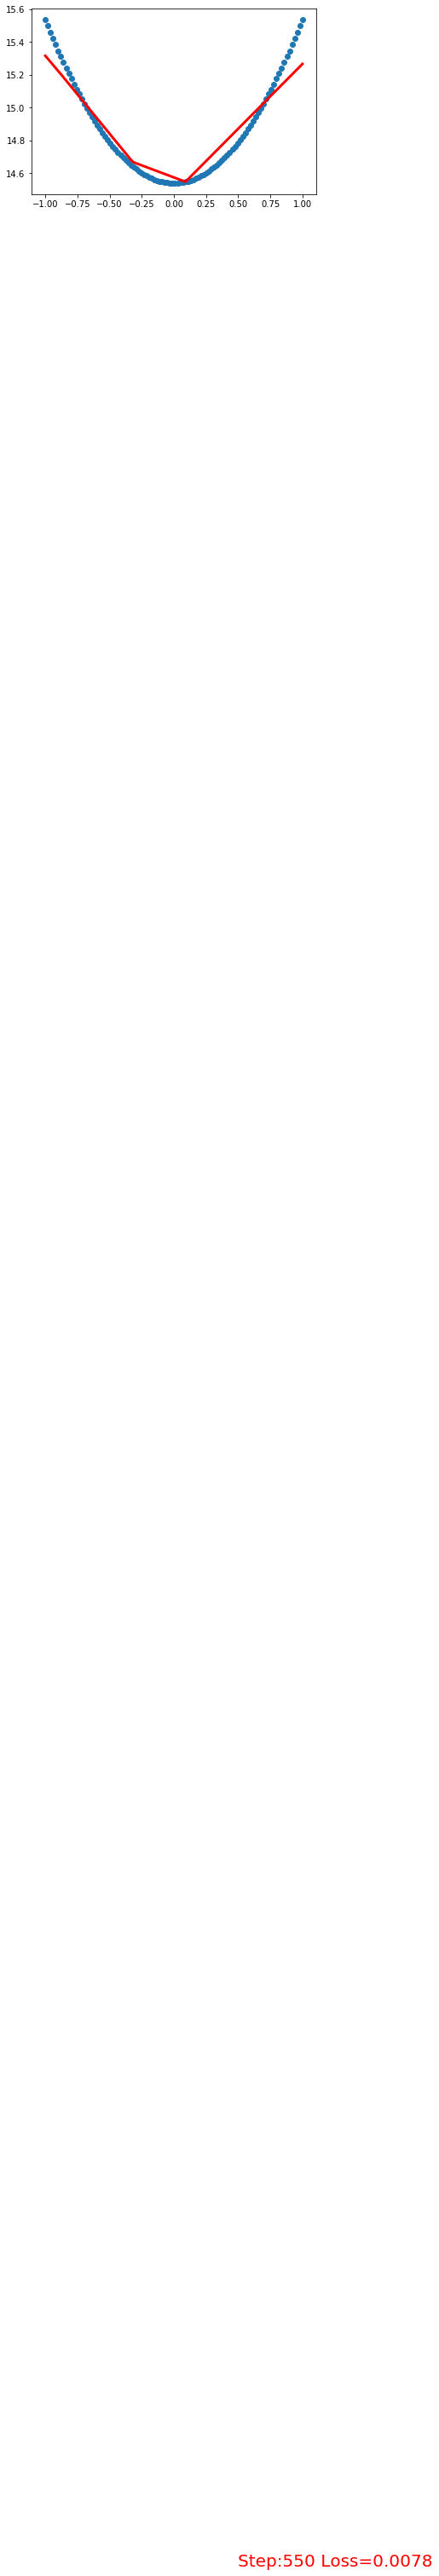

epoch 600, loss 0.00665776


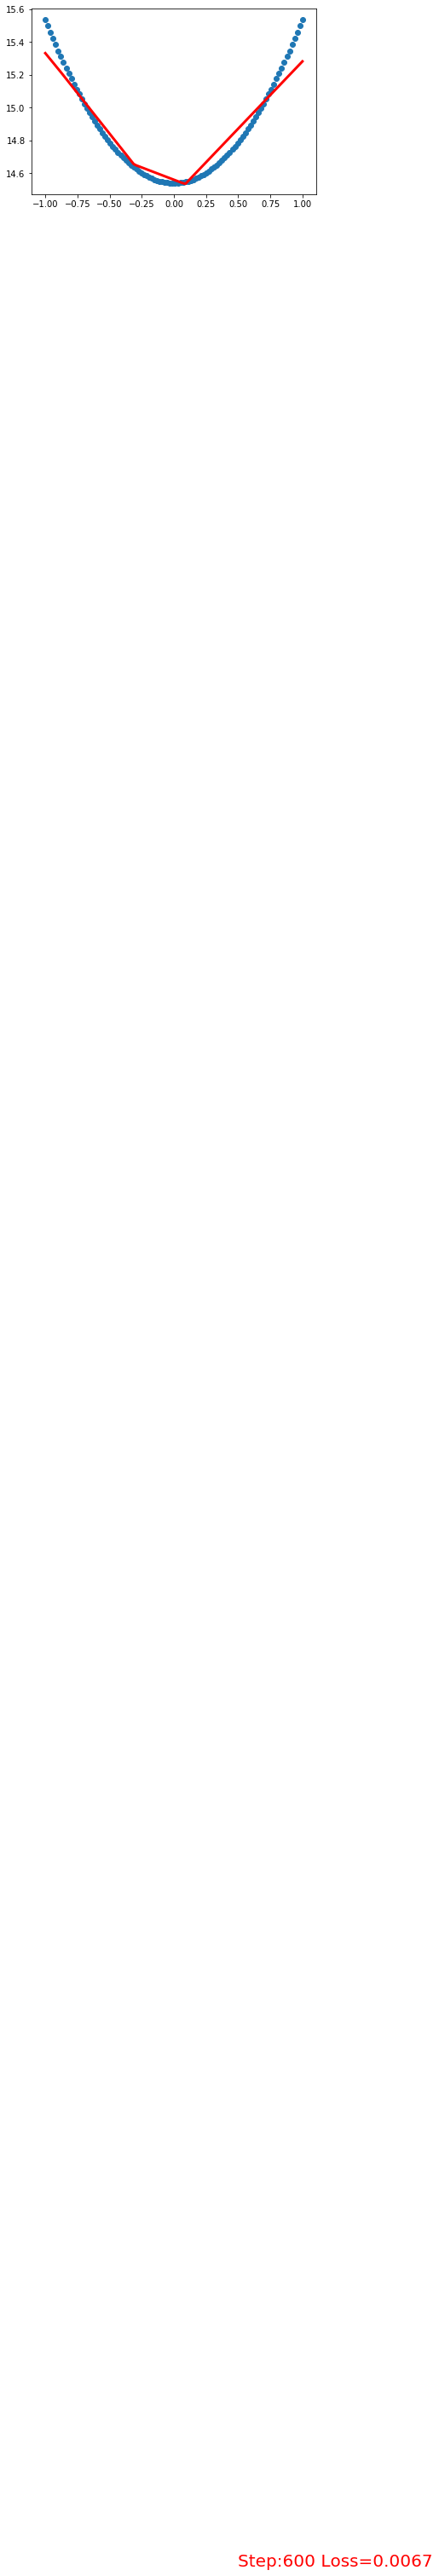

epoch 650, loss 0.00579732


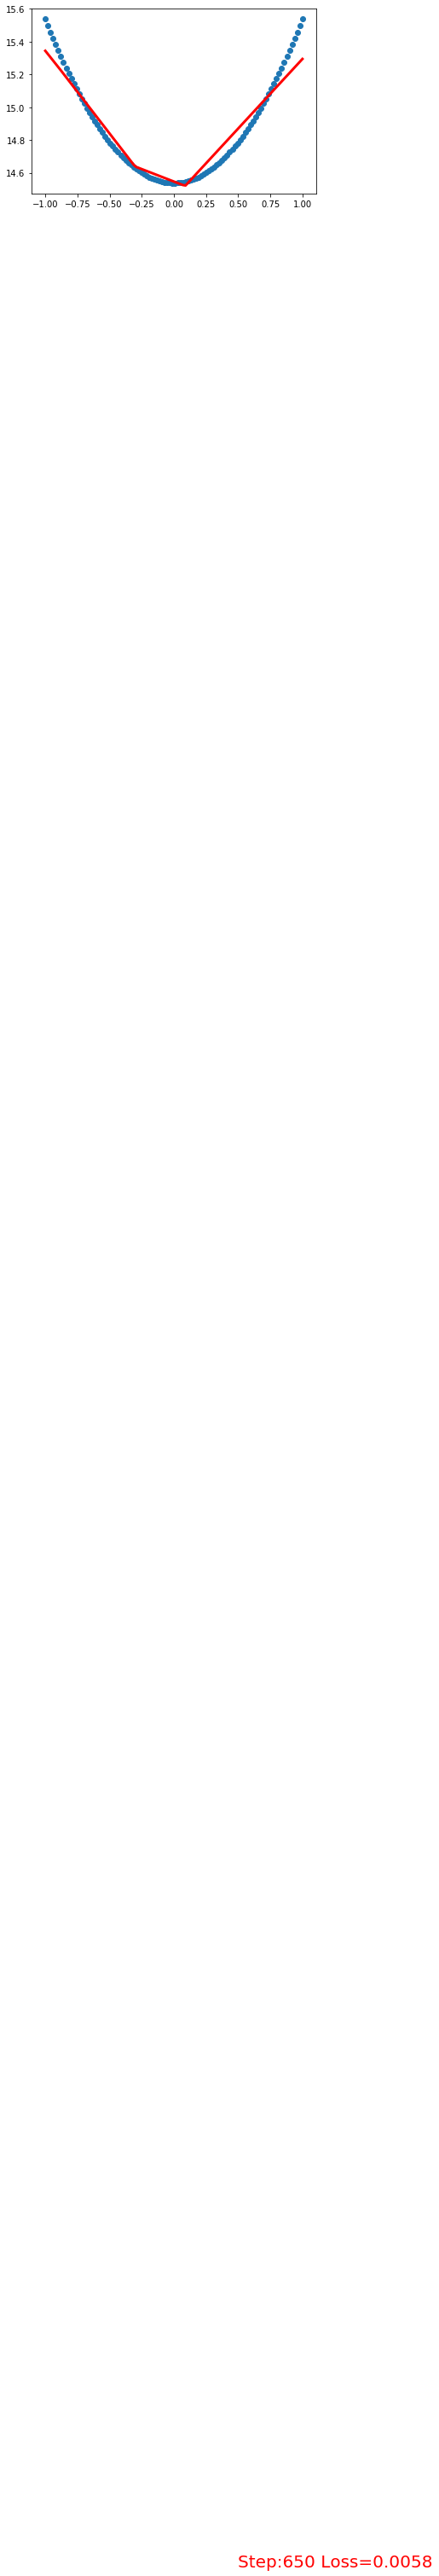

epoch 700, loss 0.00515306


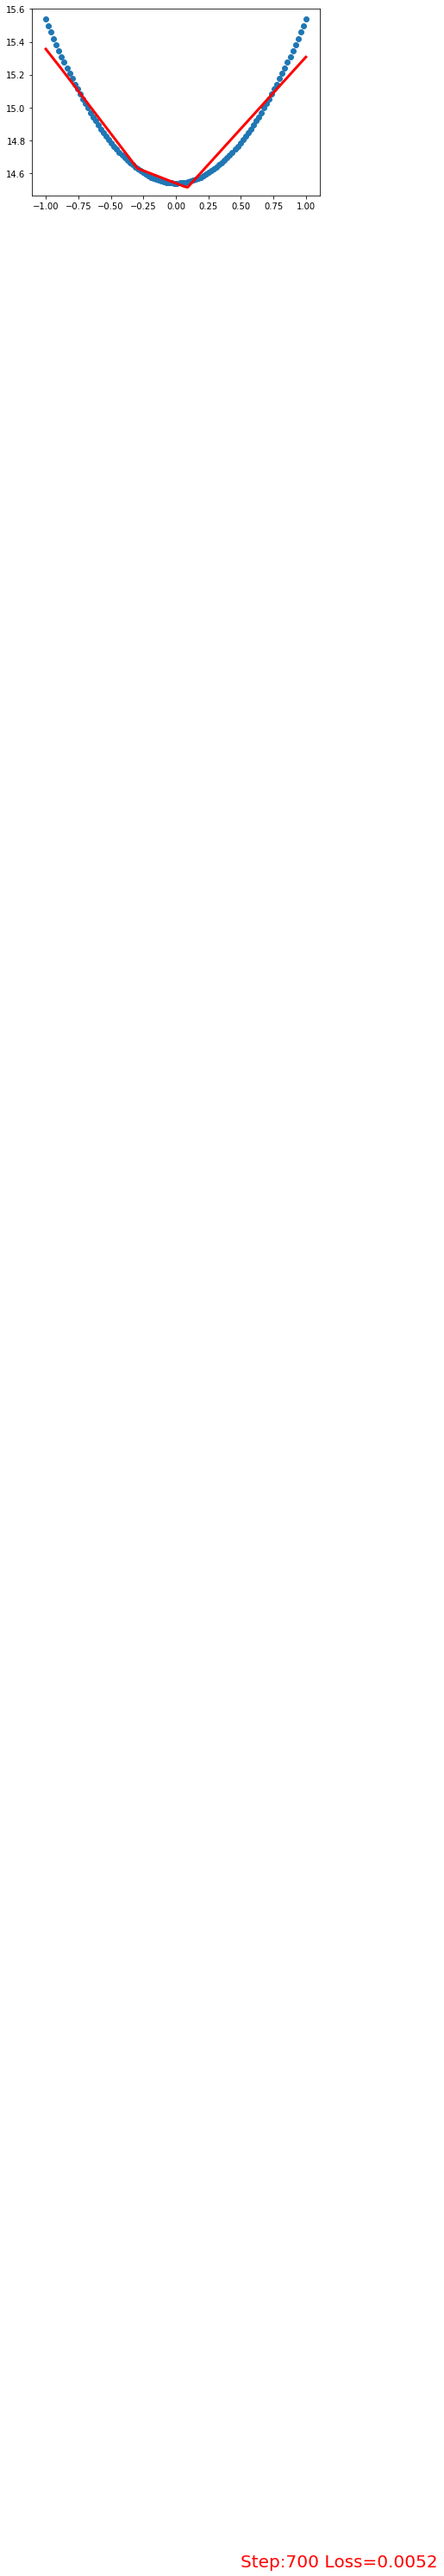

epoch 750, loss 0.00466914


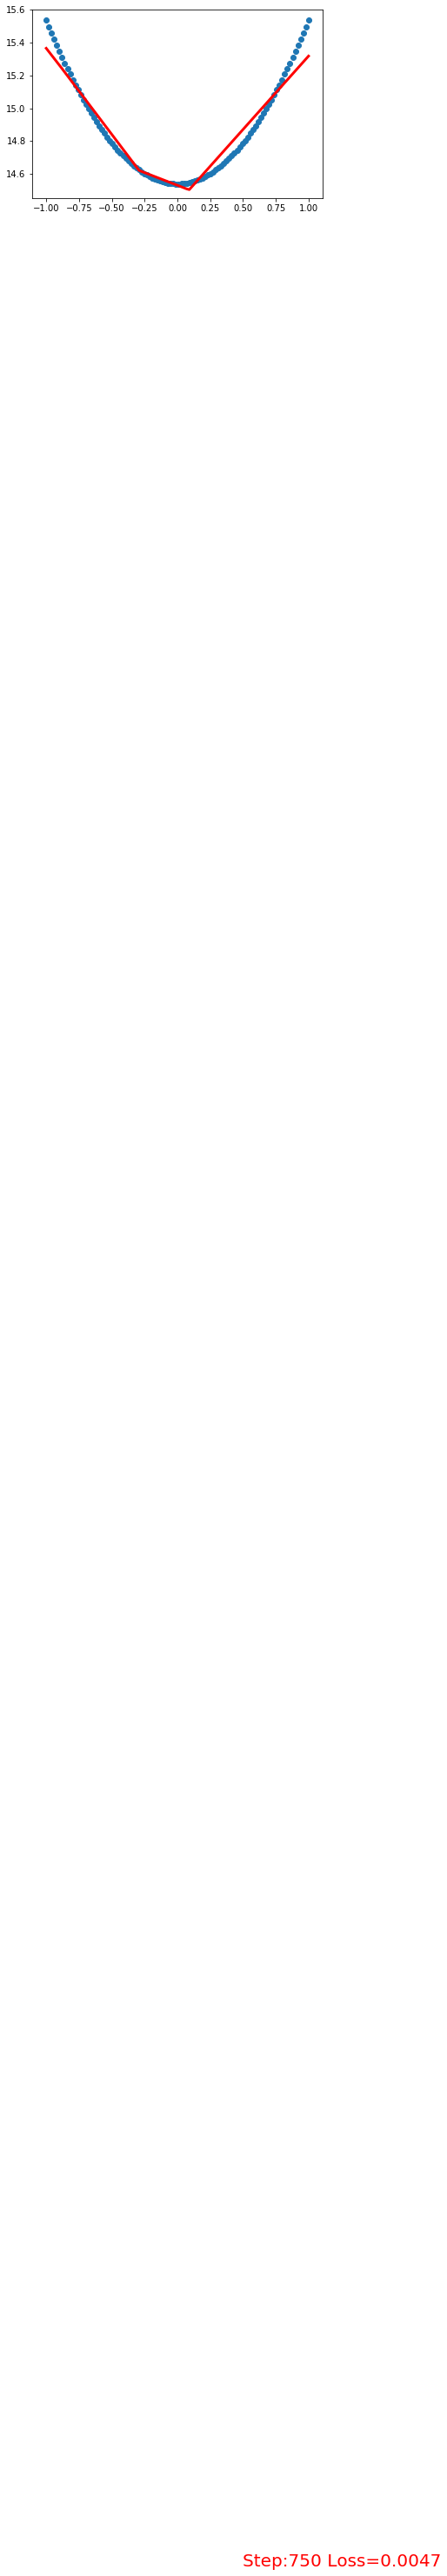

epoch 800, loss 0.00430049


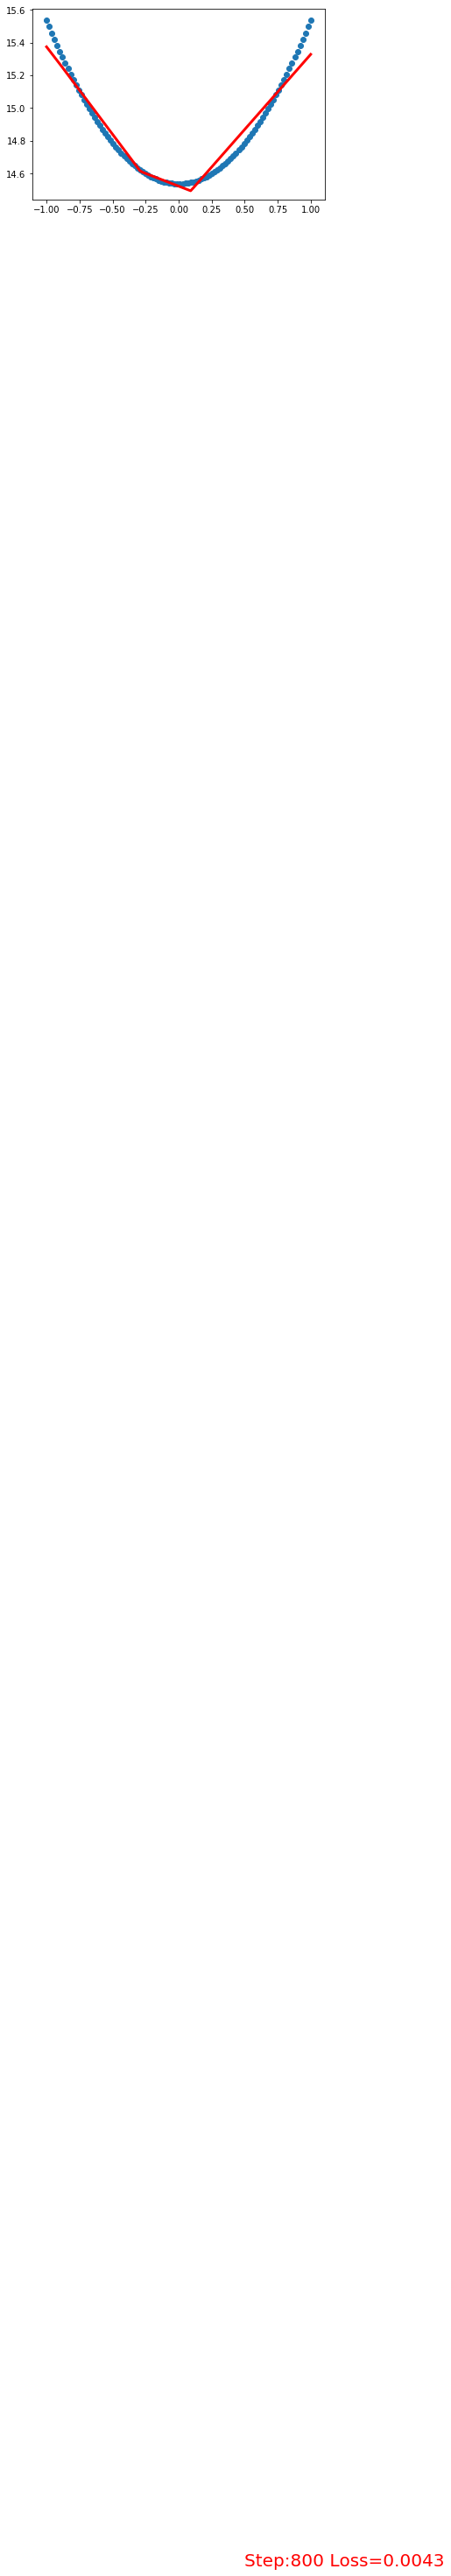

epoch 850, loss 0.00401025


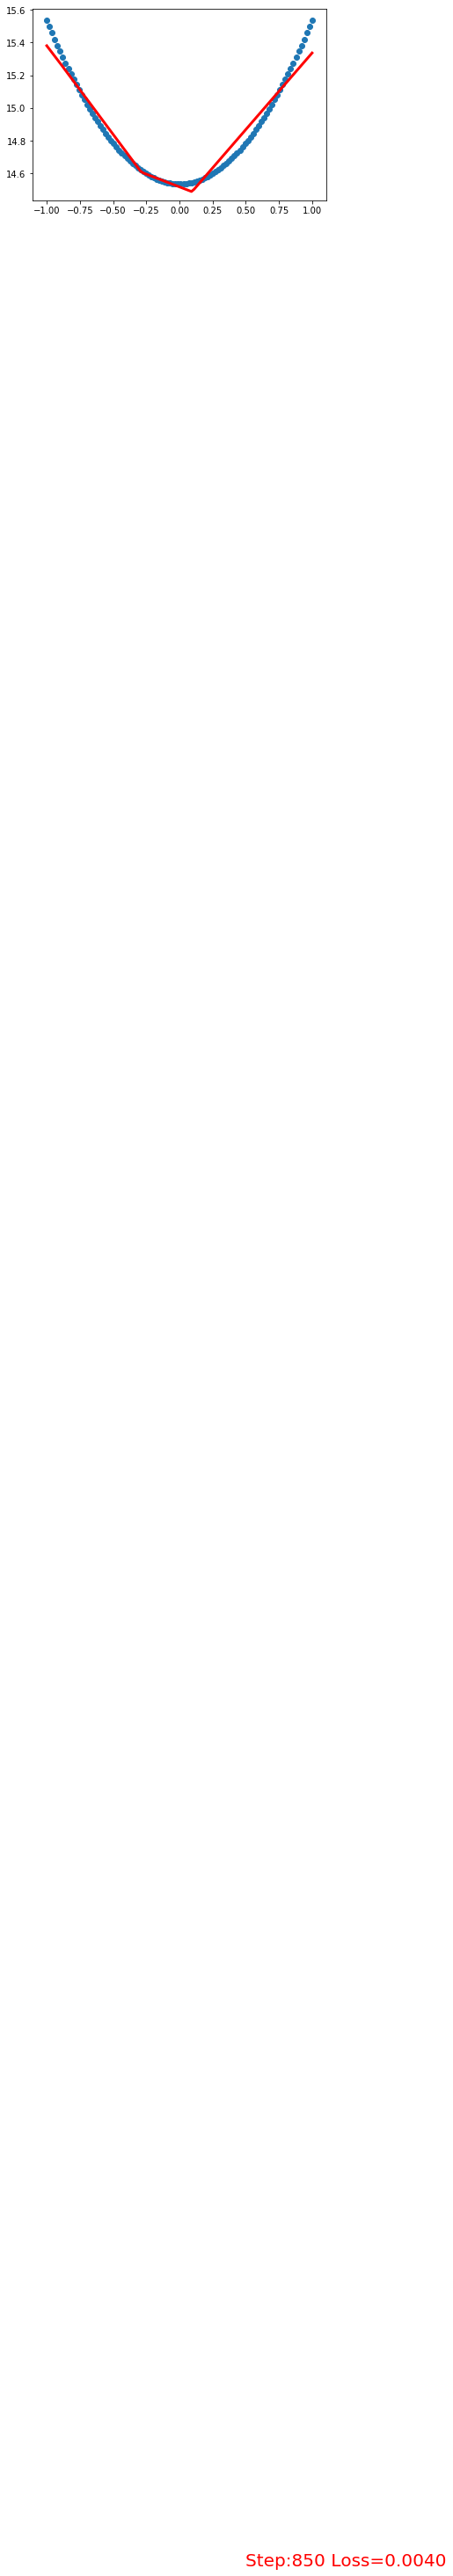

epoch 900, loss 0.00378000


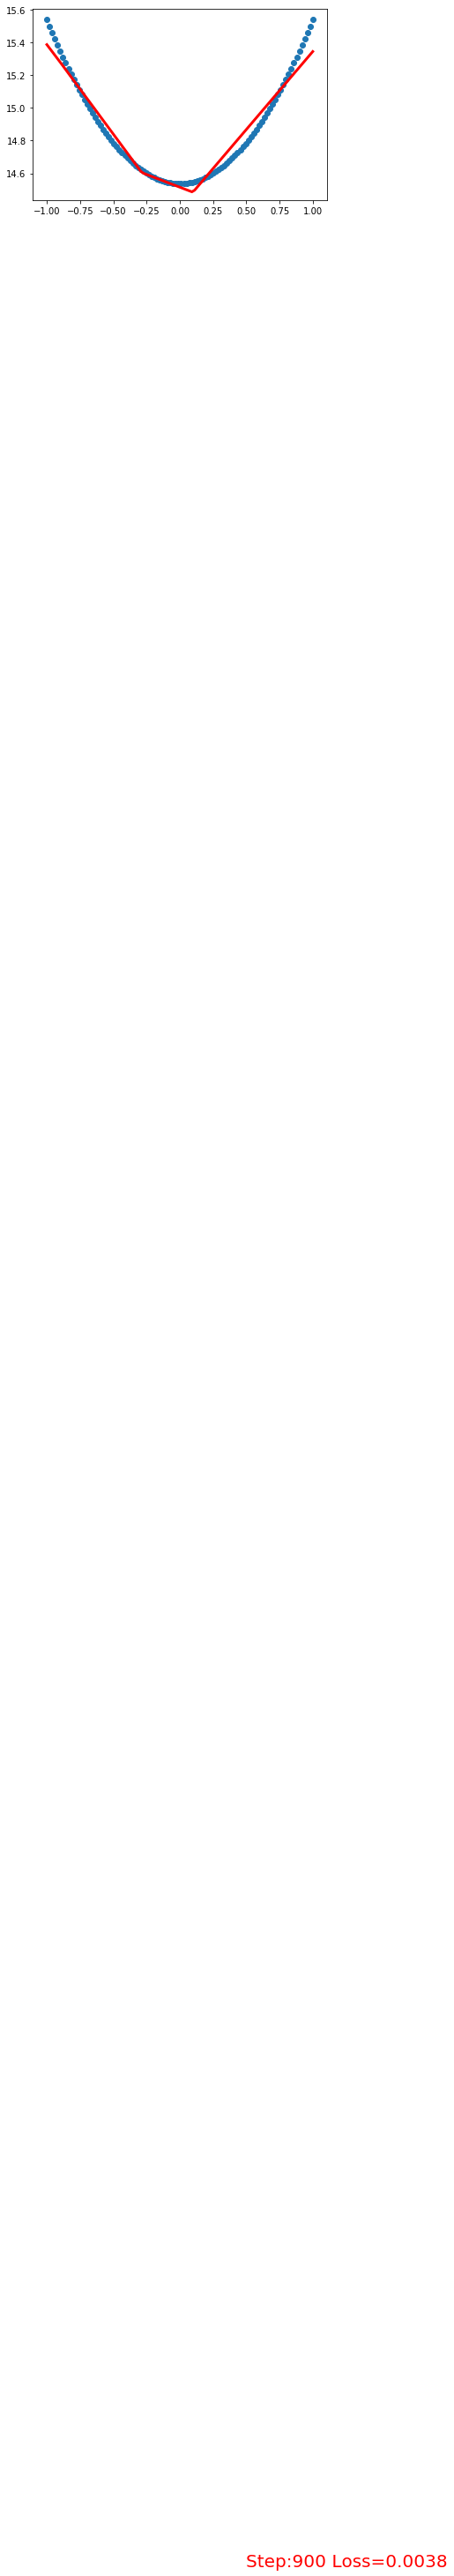

epoch 950, loss 0.00359428


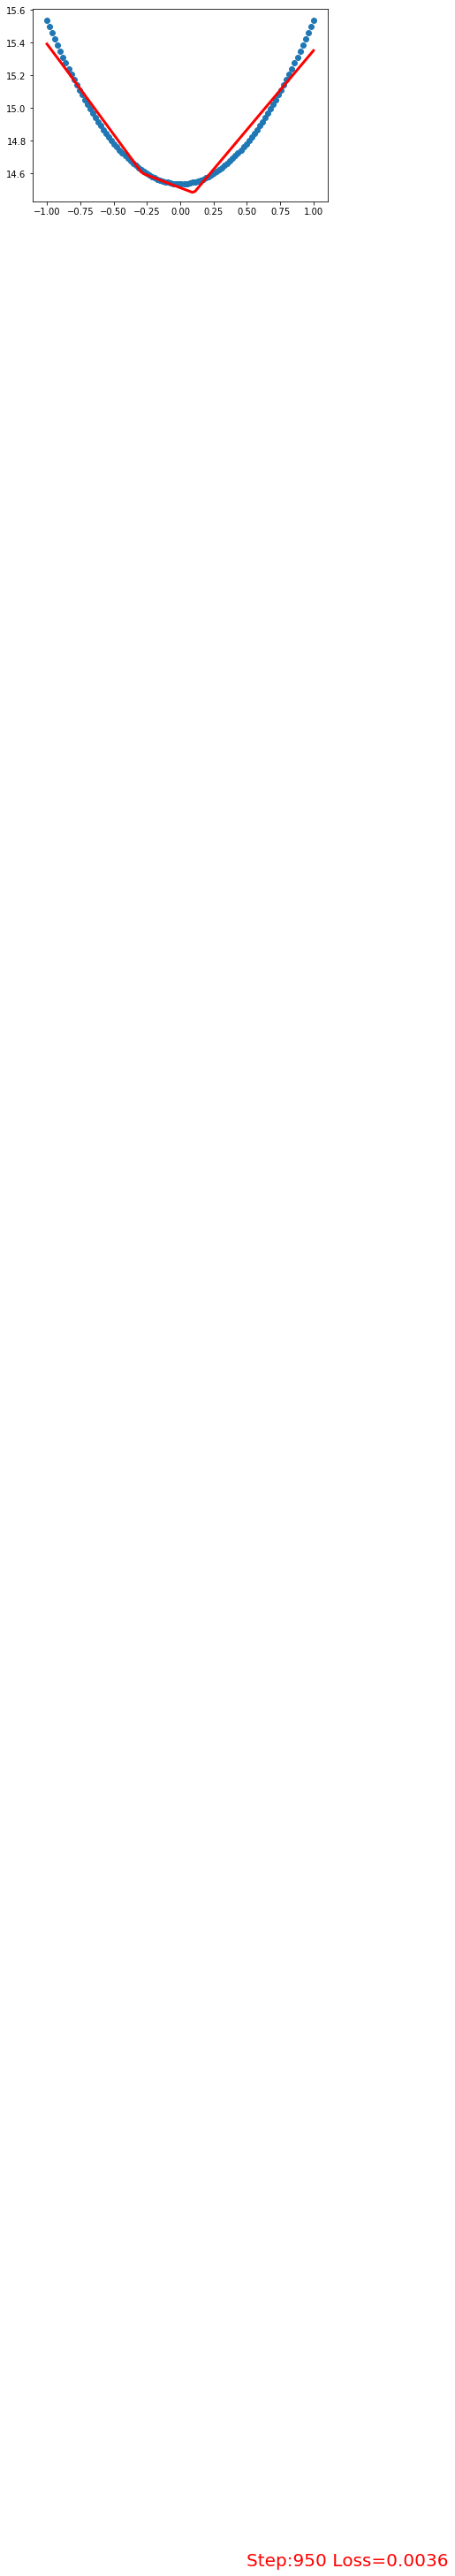

epoch 1000, loss 0.00344199


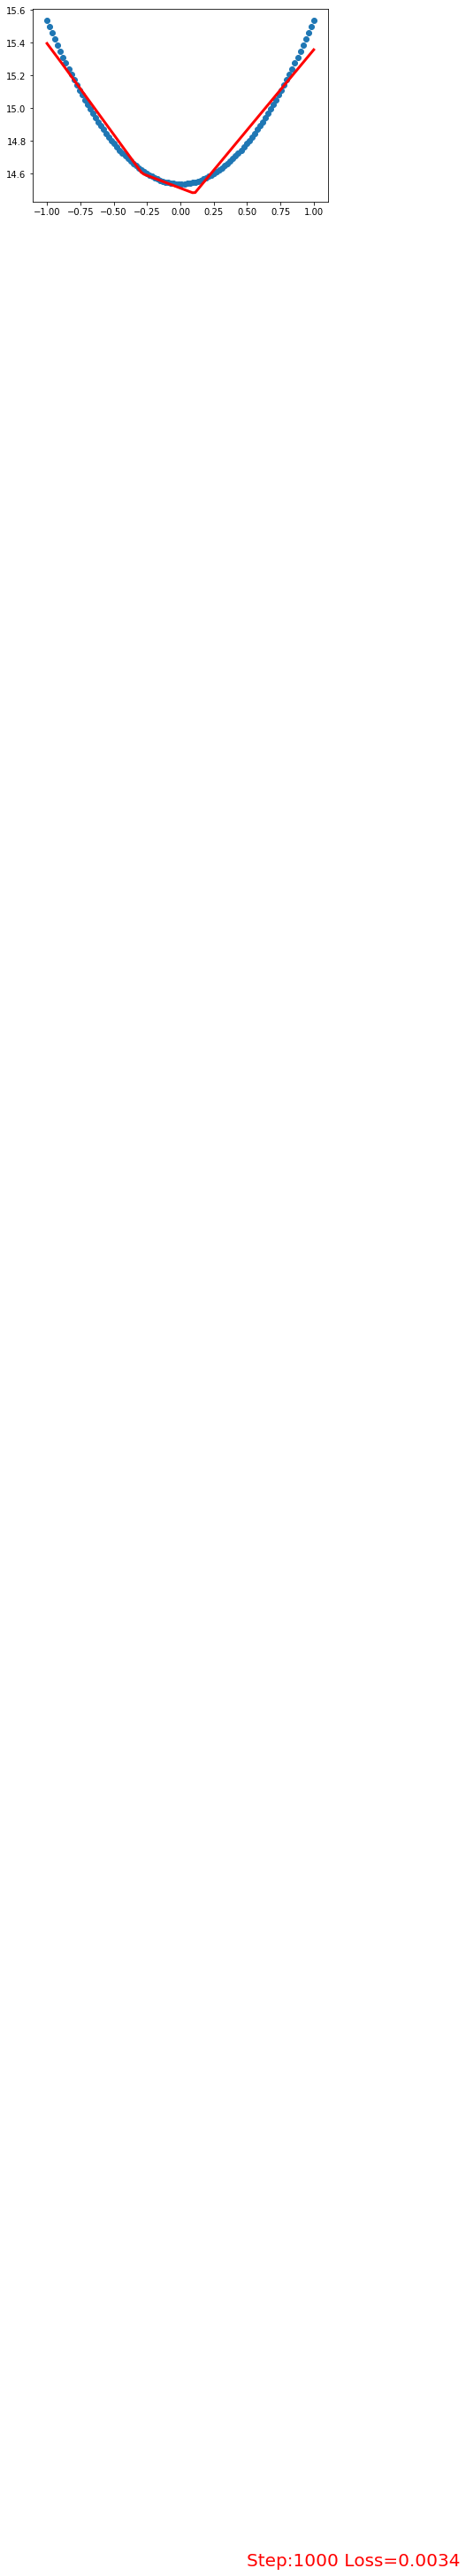

In [26]:
epochs = 1000
for epoch in range(epochs):
    epoch += 1
    
    # convert to variables
    x = Variable(torch.from_numpy(x_train))
    y = Variable(torch.from_numpy(y_train))
    
    # clear gradient w.r.t parameters
    optimizer.zero_grad()
    
    # forward to get output
    predict =model(x)
    
    
    # calculate loss
    loss = loss_func(predict, y)
    
    # backword to get gradient
    loss.backward()
    
    #update parameters
    optimizer.step()
    
    if epoch % 50 == 0:
    # plot and show learning process
        print("epoch %d, loss %.8f" % (epoch, loss.data[0]))
        
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), predict.data.numpy(), 'r-', lw=3)
        plt.text(0.5, 0, 'Step:%d Loss=%.4f' % (epoch, loss.data[0]), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()
    
    
    

    